## Data preprocessing
Data preprocessing is the first step in any data analysis or machine learning pipeline. It involves cleaning, transforming and organizing raw data to ensure it is accurate, consistent and ready for modeling.

## Step1: import Libraries and Load Dataset

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data1.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


## Step 2: Inspect Data Structure and check Missign values


In [3]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB
Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64


## Step 3 : Statistical Summary and Visualizing Outliers

In [ ]:
df.describe() 
#Computes count, mean, std deviation, min/max
#and quartiles for numerical columns.

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000
mean,11.500000,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,7.071068,0.510754,3.526299,0.349527,0.33002,210.735341
min,0.000000,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,5.750000,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,11.500000,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,17.250000,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,23.000000,2017.000000,12.000000,2.750000,6.20000,1464.000000


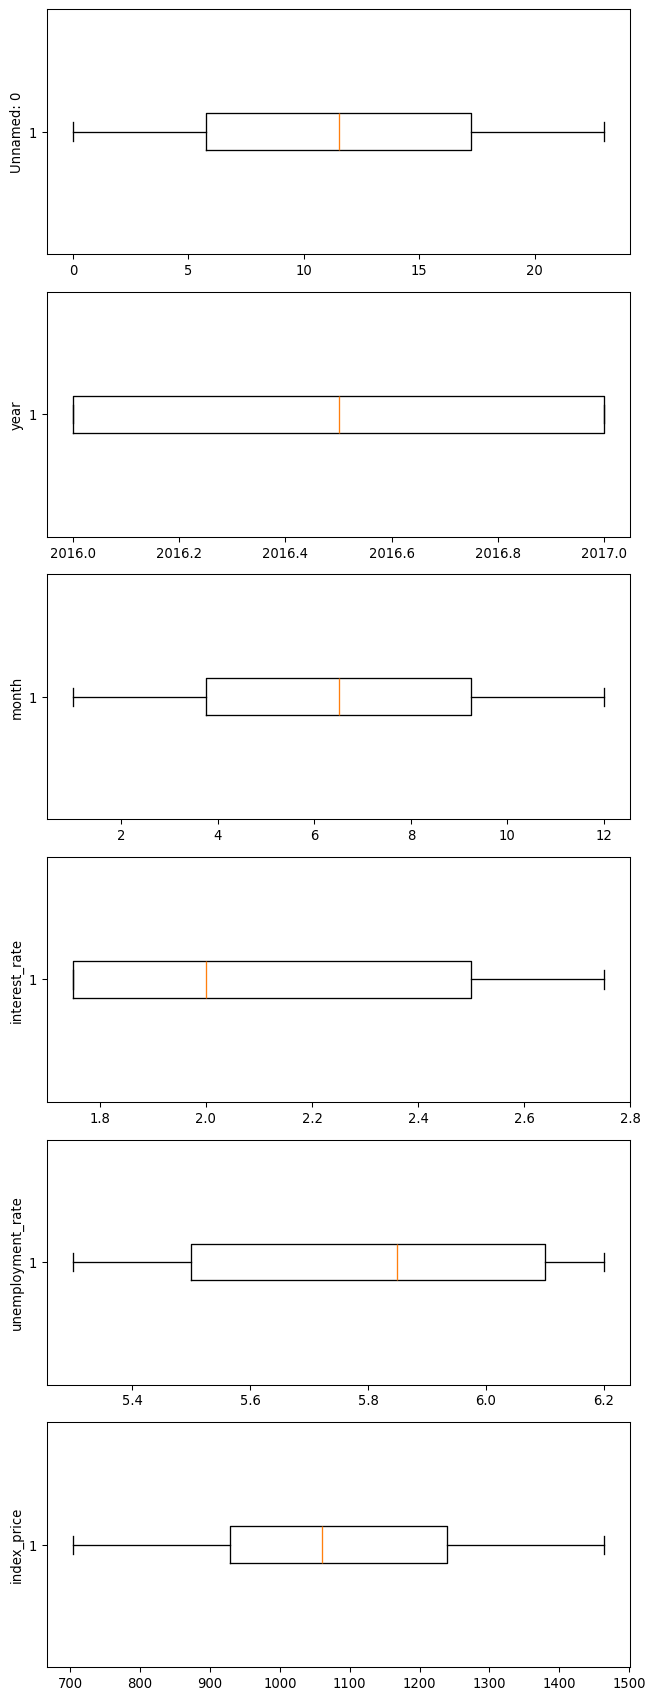

In [ ]:
fig, axs = plt.subplots(len(df.columns), 1, figsize=(7, 18), dpi=95)
#variance - How much value is spread
#Fig - compelete figure
#axs -> represnts the actual graphs
#DPI-Dots per inch
#enumerate It gives index + value together.
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()#cutoff the overlapping
plt.show()
# Box → Q1 to Q3 (IQR)
# Line inside box → Median
# Whiskers → range within 1.5 × IQR
# Dots outside → Outliers
# vert=False
#Box plots help you see outliers, variance, skewness,
# and scale problems so you can fix data issues 
# before training a model.


## 1️⃣ `Unnamed: 0`

**What I see**

* Values from ~0 to ~23
* Median around ~11
* No extreme outliers

**What it means**

* This looks like an **index column**, not a real feature
* It just counts rows

**What you should do**
🚨 **DROP THIS COLUMN**

```python
df.drop(columns=['Unnamed: 0'], inplace=True)
```

Keeping it adds **noise**, not information.

---

## 2️⃣ `year`

**What I see**

* Almost all values between **2016 and 2017**
* Very tiny spread
* Median ~2016.5

**What it means**

* Very **low variance**
* Almost constant feature

**What you should do**
❌ **Drop it**

* A near-constant feature cannot explain target variation
* It contributes to underfitting

---

## 3️⃣ `month`

**What I see**

* Range from 1 to 12
* Median around 6–7
* Symmetric spread
* No outliers

**What it means**

* Healthy distribution
* Seasonal signal might exist

**What you should do**
✅ **Keep**
(Optional improvement: treat as cyclical later)

---

## 4️⃣ `interest_rate`

**What I see**

* Narrow range (~1.7 to ~2.8)
* Median ~2.0
* Slight right skew
* No extreme outliers

**What it means**

* Small variance
* Weak but stable signal

**What you should do**
⚠️ **Keep, but scale**

```python
StandardScaler()
```

Don’t expect strong predictive power alone.

---

## 5️⃣ `unemployment_rate`

**What I see**

* Tight range (~5.3 to ~6.2)
* Median ~5.8
* Symmetric

**What it means**

* Low variance
* Weak explanatory power on its own

**What you should do**
⚠️ **Keep, but don’t expect magic**
Scaling required.

---

## 6️⃣ `index_price` (MOST IMPORTANT 🔥)

**What I see**

* Wide range (~700 to ~1450)
* Good spread
* Median ~1100
* No extreme outliers

**What it means**

* Strong signal
* High variance
* Likely main driver of target

**What you should do**
✅ **Definitely keep**
✅ Scale it
✅ Likely dominates regression

---

## 🔴 BIG REASON FOR YOUR LOW R² (IMPORTANT)

Most of your features:

* Have **very small variance**
* Do not change much over time

Only **index_price** has strong variation.

👉 This explains:

* Flat predictions
* R² ≈ 0.05
* Model predicting mean

---

## What your box plots are telling you (summary table)

| Feature           | Action          |
| ----------------- | --------------- |
| Unnamed: 0        | ❌ Drop          |
| year              | ❌ Drop          |
| month             | ✅ Keep          |
| interest_rate     | ⚠️ Keep + scale |
| unemployment_rate | ⚠️ Keep + scale |
| index_price       | ✅ Keep          |

---

## What to do NEXT (very important)

### 1️⃣ Drop useless columns

```python
df = df.drop(columns=['Unnamed: 0', 'year'])
```

### 2️⃣ Scale features

```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

### 3️⃣ Retrain model and recheck:

* R²
* Actual vs Predicted plot

---

## One-line takeaway (lock this in 🔒)

> Your box plots show that most features have very low variance, causing underfitting; only `index_price` carries strong predictive power.

If you want, next I can:

* Rebuild your model step-by-step using the fixed features
* Explain how cyclical month encoding helps
* Show how box plots directly explain low R²


## Step 4: Correlation Analysis
Understand relationships between features and the target variable (Outcome). Correlation helps gauge feature importance.

df.corr(): Computes pairwise correlation coefficients between columns.
Heatmap via seaborn visualizes correlation matrix clearly.
Sorting correlations with corr['Outcome'].sort_values() highlights features most correlated with the target.

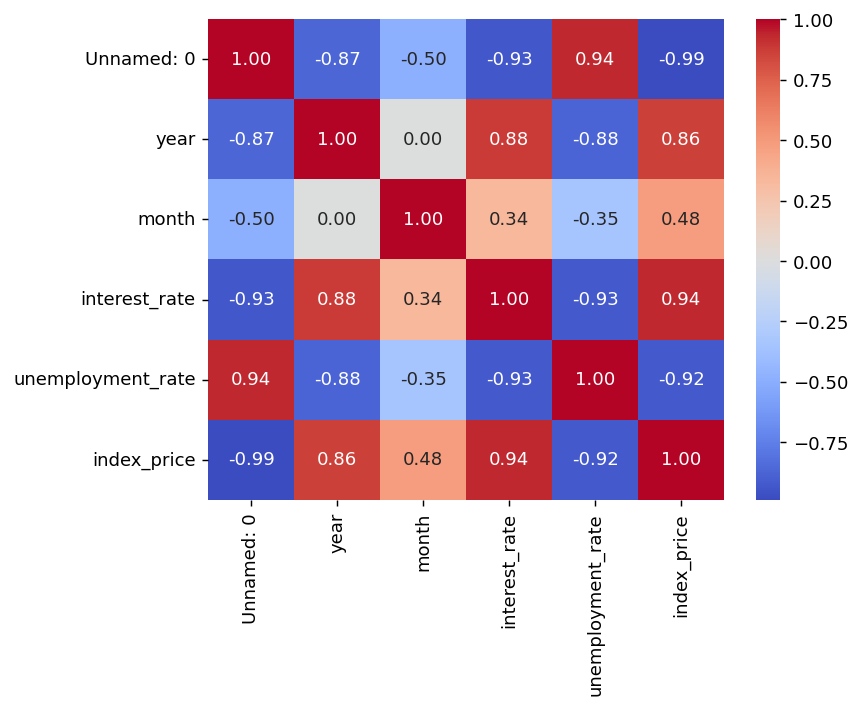

index_price          1.000000
interest_rate        0.935793
year                 0.863232
month                0.481287
unemployment_rate   -0.922338
Unnamed: 0          -0.988246
Name: index_price, dtype: float64


In [10]:
corr = df.corr()
plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()
print(corr['index_price'].sort_values(ascending=False))


In [18]:
X = df.drop(columns=['Unnamed: 0','year','index_price'],axis=1)
y = df['index_price']

1. Normalization (Min-Max Scaling): Rescales features between 0 and 1. Good for algorithms like k-NN and neural networks.

Class: MinMaxScaler from sklearn.
.fit_transform(): Learns min/max from data and applies scaling.

2. Standardization: Transforms features to have mean = 0 and standard deviation = 1, useful for normally distributed features.

Class: StandardScaler from sklearn.

In [19]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
print(X_normalized[:5])

[[1.         1.         0.        ]
 [0.90909091 0.75       0.        ]
 [0.81818182 0.75       0.        ]
 [0.72727273 0.75       0.        ]
 [0.63636364 0.75       0.11111111]]


In [20]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print(X_standardized[:5])

[[ 1.59325501  1.97880334 -1.47026414]
 [ 1.30357228  1.24816826 -1.47026414]
 [ 1.01388955  1.24816826 -1.47026414]
 [ 0.72420682  1.24816826 -1.47026414]
 [ 0.43452409  1.24816826 -1.16073485]]


1. What is Feature Engineering?

Feature Engineering is the process of creating, transforming, or selecting features (columns) from raw data to improve the performance of a machine learning model.

Features are the inputs your model uses to make predictions.

The better the features, the better your model can learn patterns.

Think of it like preparing ingredients before cooking: good ingredients (features) make a delicious dish (model).

2. Why is it important?

Machine learning models can only learn from the features you give them.

Raw data is often messy or not in the right format.

Feature engineering can increase accuracy, reduce training time, and help the model understand the data better.

3. Common Feature Engineering Techniques
A. Creating New Features

Combining or extracting information from existing data.

Examples:

From a date column, create day, month, year, weekday.

From text, extract length of text, number of words, presence of certain keywords.

From numerical columns, create ratios, differences, or interaction terms.

B. Transforming Features

Change the scale or distribution of data to make it easier for models to learn.

Examples:

Normalization / Standardization: scale features to 0-1 or mean=0, std=1.

Log transformation: reduce skewed data (like income or price).

Binning / Discretization: convert continuous numbers into categories (age → child, adult, senior).

C. Encoding Categorical Variables

Machine learning models need numbers, not text.

Techniques:

One-hot encoding: convert a category into multiple binary columns.

Label encoding: convert categories into numbers (0,1,2…).

Target encoding: replace categories with their average target value.

D. Handling Missing Values

Missing data can harm model performance.

Techniques:

Fill with mean/median/mode

Fill with predicted values

Create a new feature indicating missingness

E. Feature Selection

Keep only important features and remove redundant ones.

Techniques:

Correlation analysis

Feature importance from tree-based models

Dimensionality reduction (PCA, t-SNE)


In [24]:
#Feature importance tells us which features (columns) in your data have the most 
# influence on the model’s predictions.
import pandas as pd
import numpy as np

# Example dataset
df = pd.DataFrame({
    'age':[25, 35, 45, 20],
    'income':[50000, 60000, 80000, 30000],
    'city':['Mumbai', 'Delhi', 'Mumbai', 'Chennai']
})

# Feature engineering

# 1. Create new feature
df['income_per_age'] = df['income'] / df['age']


# 3. Transform feature (log)
df['log_income'] = np.log(df['income'])

print(df)


   age  income     city  income_per_age  log_income
0   25   50000   Mumbai     2000.000000   10.819778
1   35   60000    Delhi     1714.285714   11.002100
2   45   80000   Mumbai     1777.777778   11.289782
3   20   30000  Chennai     1500.000000   10.308953


In [23]:
import pandas as pd
import numpy as np

# Example dataset
df = pd.DataFrame({
    'age':[25, 35, 45, 20],
    'income':[50000, 60000, 80000, 30000],
    'city':['Mumbai', 'Delhi', 'Mumbai', 'Chennai']
})

# Feature engineering

# 1. Create new feature
df['income_per_age'] = df['income'] / df['age']

# 2. Encode categorical variable
df = pd.get_dummies(df, columns=['city'])

# 3. Transform feature (log)
df['log_income'] = np.log(df['income'])

print(df)


   age  income  income_per_age  city_Chennai  city_Delhi  city_Mumbai  \
0   25   50000     2000.000000         False       False         True   
1   35   60000     1714.285714         False        True        False   
2   45   80000     1777.777778         False       False         True   
3   20   30000     1500.000000          True       False        False   

   log_income  
0   10.819778  
1   11.002100  
2   11.289782  
3   10.308953  
